⬆ **CARGA DE DATOS**

In [4]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Leer el CSV desde la ruta de tu Drive
# Asegúrate de reemplazar la ruta con la ubicación exacta de tu archivo
file_path = '/content/drive/MyDrive/data_telecom_X.csv'
df = pd.read_csv(file_path)

# Verificar los primeros registros
df.head()

,Churn,Contract,PaymentMethod,TechSupport,PaperlessBilling,tenure,InternetService,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Charges.Monthly,Charges.Total
0,No,One year,Mailed check,Yes,Yes,9,DSL,Yes,No,Yes,No,Yes,No,65.6,593.3
1,No,Month-to-month,Mailed check,No,No,9,DSL,Yes,No,No,No,No,Yes,59.9,542.4
2,Yes,Month-to-month,Electronic check,No,Yes,4,Fiber optic,Yes,No,No,Yes,No,No,73.9,280.85
3,Yes,Month-to-month,Electronic check,No,Yes,13,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,98.0,1237.85
4,Yes,Month-to-month,Mailed check,Yes,Yes,3,Fiber optic,Yes,No,No,No,Yes,No,83.9,267.4


**Variables Categoricas**


In [7]:
categorical_cols = [
    'Contract', 'PaymentMethod', 'TechSupport', 'PaperlessBilling',
    'InternetService', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'StreamingTV', 'StreamingMovies'
]

In [8]:
# Convertir Churn a 0/1
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})

# One-Hot Encoding de las variables categóricas
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verificar el resultado
df_encoded.head()

,Churn,tenure,Charges.Monthly,Charges.Total,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TechSupport_No internet service,...,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0.0,9,65.6,593.3,True,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
1,0.0,9,59.9,542.4,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,1.0,4,73.9,280.85,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1.0,13,98.0,1237.85,False,False,False,True,False,False,...,False,False,False,True,False,True,False,True,False,True
4,1.0,3,83.9,267.4,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


**Calcular proporción**

In [9]:
# Contar clientes por clase
conteo_churn = df_encoded['Churn'].value_counts()

# Calcular proporción
proporcion_churn = conteo_churn / conteo_churn.sum()
print(proporcion_churn)

Churn
0.0    0.73463
1.0    0.26537
Name: count, dtype: float64


**Correlación**

In [34]:
# Seleccionar solo columnas numéricas
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df_encoded[numerical_cols]

In [35]:
# Matriz de correlación
corr_matrix = df_numeric.corr()

# Mostrar la correlación con Churn
print(corr_matrix['Churn'].sort_values(ascending=False))

Churn              1.000000
Charges.Monthly    0.193356
Charges.Total     -0.199428
tenure            -0.352229
Name: Churn, dtype: float64


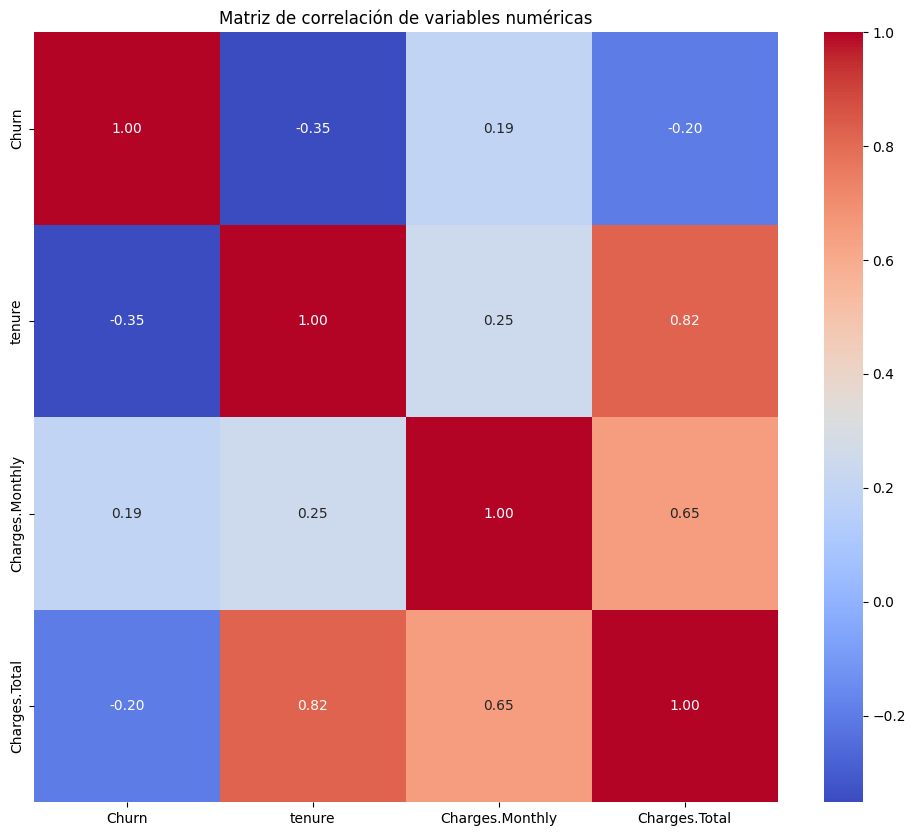

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matriz de correlación de variables numéricas")
plt.show()

**Analisis dirigido**

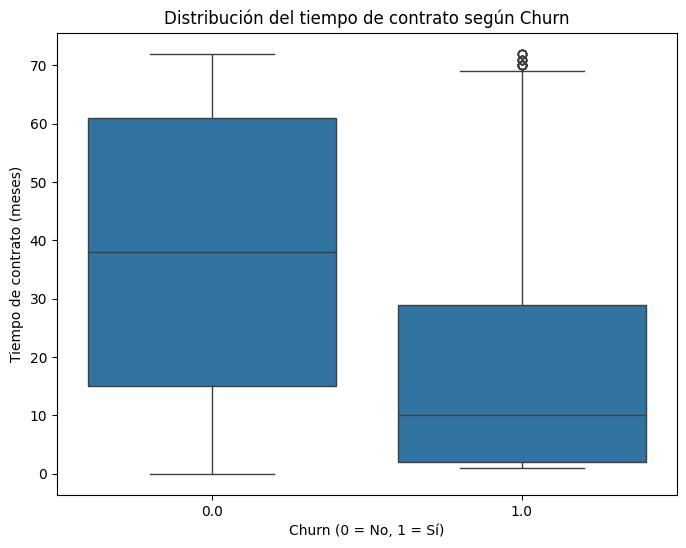

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='tenure', data=df_encoded)
plt.title('Distribución del tiempo de contrato según Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Tiempo de contrato (meses)')
plt.show()


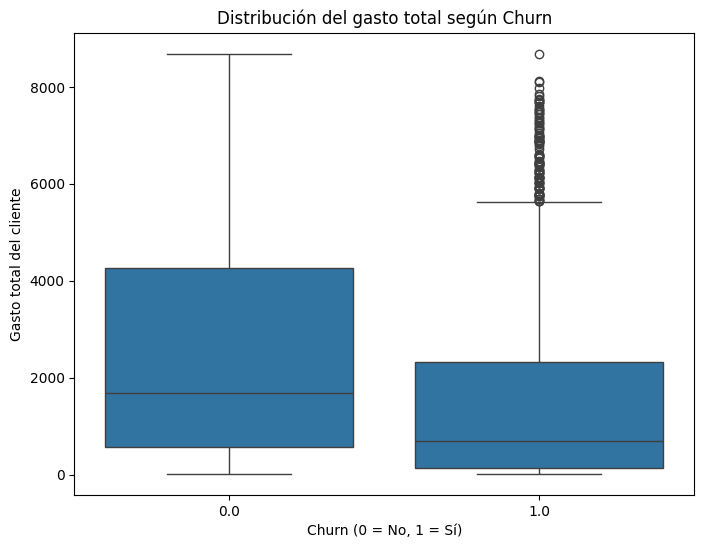

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Charges.Total', data=df_encoded)
plt.title('Distribución del gasto total según Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Gasto total del cliente')
plt.show()

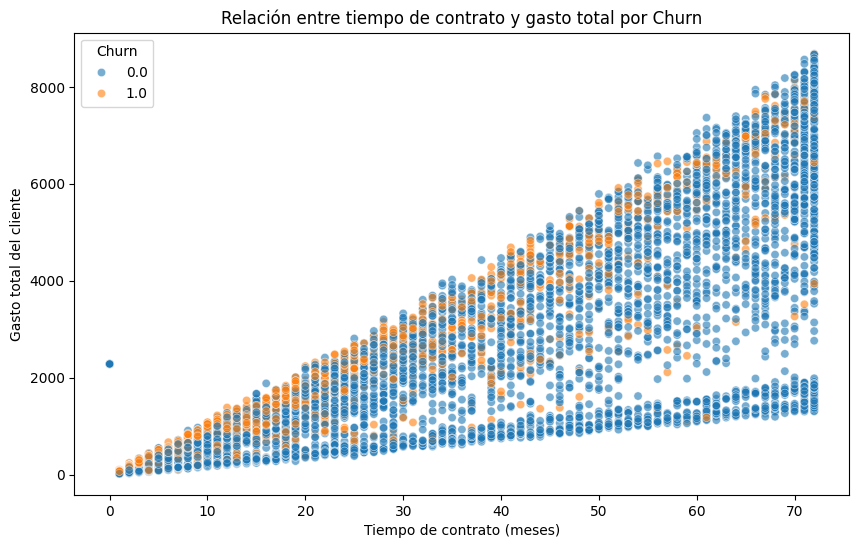

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', data=df_encoded, alpha=0.6)
plt.title('Relación entre tiempo de contrato y gasto total por Churn')
plt.xlabel('Tiempo de contrato (meses)')
plt.ylabel('Gasto total del cliente')
plt.show()

In [12]:
df_encoded['Churn'].isnull().sum()

np.int64(224)

In [13]:
# Eliminar filas donde Churn es NaN
df_encoded = df_encoded.dropna(subset=['Churn'])

# Verificar
df_encoded['Churn'].isnull().sum()

np.int64(0)

In [24]:
# Reemplazar espacios vacíos con NaN
df_encoded['Charges.Total'] = df_encoded['Charges.Total'].replace(' ', pd.NA)

# Convertir a numérico
df_encoded['Charges.Total'] = pd.to_numeric(df_encoded['Charges.Total'], errors='coerce')

# Rellenar NaN con la media
df_encoded['Charges.Total'] = df_encoded['Charges.Total'].fillna(df_encoded['Charges.Total'].mean())



📟**Balanceo**

In [25]:
from sklearn.model_selection import train_test_split

# X: todas las columnas excepto 'Churn'
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Ver proporciones
print(y_train_rus.value_counts())

Churn
0.0    1495
1.0    1495
Name: count, dtype: int64


In [27]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print(y_train_ros.value_counts())

Churn
0.0    4139
1.0    4139
Name: count, dtype: int64


In [28]:
# Verificar si hay valores nulos
print(X_train.isnull().sum().sum())

# Verificar si hay valores tipo objeto que no sean dummies
print(X_train.dtypes.value_counts())

0
bool       21
float64     2
int64       1
Name: count, dtype: int64


In [29]:
# Convertir todas las columnas booleanas a int
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})


In [30]:
# Ver cuál es la columna tipo object
print(X_train.select_dtypes('object').columns)

Index([], dtype='object')


In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(y_train_smote.value_counts())

Churn
0.0    4139
1.0    4139
Name: count, dtype: int64


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Crear y entrenar el modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Predecir sobre el set de prueba
y_pred = rf.predict(X_test)

# Evaluar desempeño
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[867 168]
 [155 219]]
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84      1035
         1.0       0.57      0.59      0.58       374

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409



In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

**ARBOL DE DECISIÓN**

In [41]:
# Crear el modelo
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Entrenar con los datos balanceados por SMOTE
dt_model.fit(X_train_smote, y_train_smote)

# Predecir sobre el conjunto de prueba
y_pred_dt = dt_model.predict(X_test)

# Evaluar desempeño
print("Matriz de confusión - Árbol de Decisión")
print(confusion_matrix(y_test, y_pred_dt))
print("\nReporte de clasificación - Árbol de Decisión")
print(classification_report(y_test, y_pred_dt))

Matriz de confusión - Árbol de Decisión
[[808 227]
 [157 217]]

Reporte de clasificación - Árbol de Decisión
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      1035
         1.0       0.49      0.58      0.53       374

    accuracy                           0.73      1409
   macro avg       0.66      0.68      0.67      1409
weighted avg       0.74      0.73      0.73      1409



**RANDOM FOREST**

In [42]:
# Crear el modelo
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')

# Entrenar con los datos balanceados por SMOTE
rf_model.fit(X_train_smote, y_train_smote)

# Predecir sobre el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar desempeño
print("Matriz de confusión - Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print("\nReporte de clasificación - Random Forest")
print(classification_report(y_test, y_pred_rf))


Matriz de confusión - Random Forest
[[867 168]
 [155 219]]

Reporte de clasificación - Random Forest
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84      1035
         1.0       0.57      0.59      0.58       374

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409



Análisis comparativo

Exactitud (Accuracy):

Random Forest (0.77) supera al Árbol de Decisión (0.73).

Esto indica que Random Forest generaliza mejor a los datos de prueba.

Precisión y Recall en churn:

Random Forest tiene mejor precisión (0.57 vs 0.49) y ligeramente mejor recall (0.59 vs 0.58).

Aunque mejora, la clase de churn todavía no se predice de manera óptima.

F1-score:

Random Forest: 0.58

Árbol de Decisión: 0.53

Random Forest logra un mejor balance entre precisión y recall.

Overfitting / Underfitting:

Árbol de Decisión simple:

Podría estar overfitting si profundiza demasiado en el entrenamiento.

También puede underfit si el árbol fue muy pequeño o con restricciones estrictas (max_depth bajo).

Random Forest:

Reduce overfitting al combinar muchos árboles.

El desempeño más alto y estable indica menos overfitting que un solo árbol, aunque aún hay margen para mejorar recall de churn.

3️⃣ Conclusiones

Mejor modelo: Random Forest, por su mayor exactitud y F1-score, y su capacidad de generalizar mejor.

Problemas detectados:

Los clientes que cancelan aún no se predicen con alto recall → posible clase minoritaria difícil de capturar.

Algunas variables podrían necesitar ingeniería adicional o transformación para mejorar la predicción.

Posibles mejoras: